# Lab 03. Z-점수 기반 이상치 탐지 실습
---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from scipy import stats

- 시계열 데이터를 생성하고 이상치 추가한다. 그리고 데이터 프레임을 생성하고 내용물을 확인해본다.

In [2]:
# 시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10    # 정규 분포를 따르는 데이터 생성 

# 이상치 추가 
values[20] = 50    # 이상치 추가
values[40] = 60

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01   7.158008
1  2023-01-02  -6.633132
2  2023-01-03   4.213342
3  2023-01-04  -4.025775
4  2023-01-05  20.119287
..        ...        ...
95 2023-04-06   7.377498
96 2023-04-07  -8.811479
97 2023-04-08  13.895400
98 2023-04-09 -14.590481
99 2023-04-10   9.171618

[100 rows x 2 columns]


- Z-점수를 계산하고 임계값을 설정한다. 그리고 이상치를 탐지한다.

In [3]:
# z_scores 계산 
z_scores = np.abs(stats.zscore(data['Value']))

# 임계값 설정 
threshold = 3 

# z_scores가 임계값을 초과하는지 확인 
outliers = z_scores > threshold

- 시각화를 해보고 이상치 값을 확인해본다. 

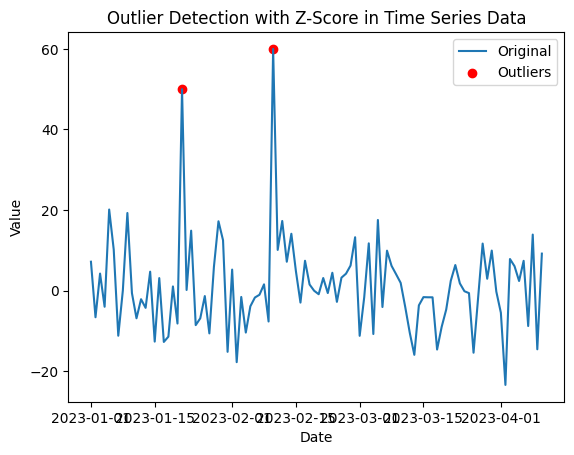

In [4]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()

plt.show()

- 이상치 값을 출력해본다.

In [5]:
# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)

Detected Outliers:
20    50.0
40    60.0
Name: Value, dtype: float64
